Ingrese la probabilidad de propagación (0 a 1): 0.2
Ingrese el número de iteraciones: 7


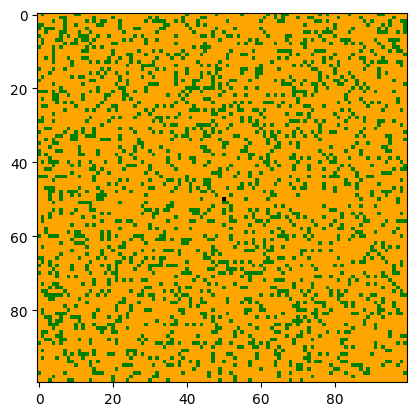

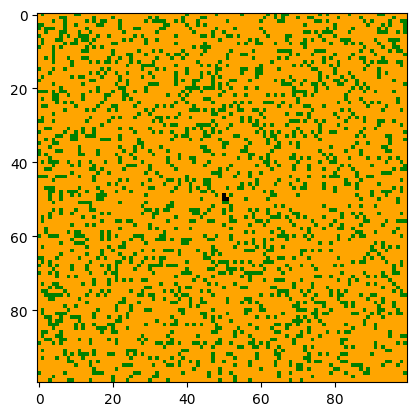

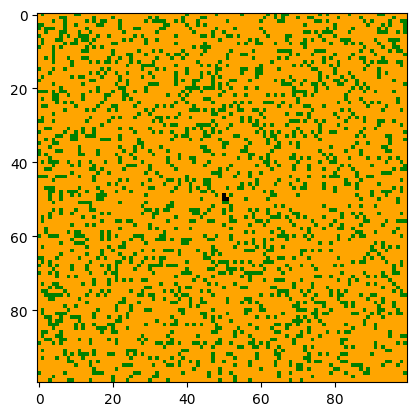

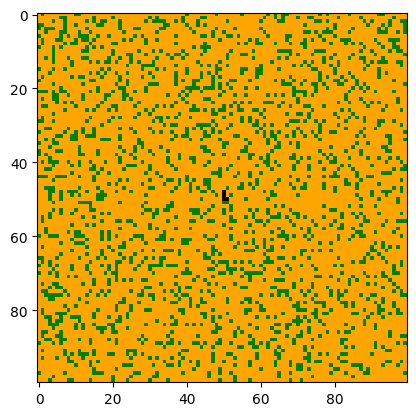

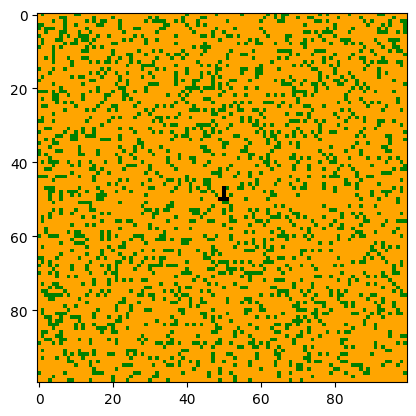

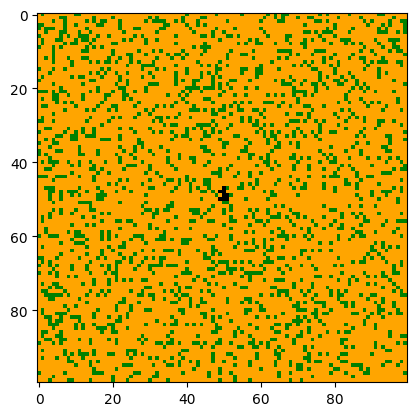

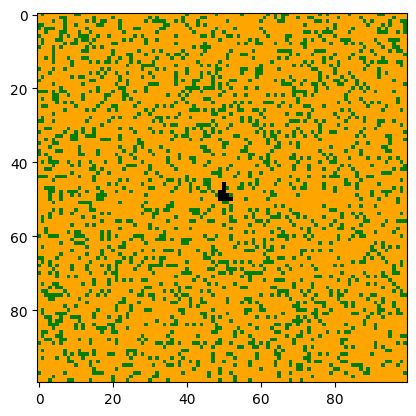

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

def inicializar_bosque(prob_arbol=0.8):
    return np.random.choice([0, 1], size=(100, 100), p=[1-prob_arbol, prob_arbol])

def propagar_fuego(bosque, p):
    nuevo_bosque = bosque.copy()
    for i in range(1, bosque.shape[0]-1):
        for j in range(1, bosque.shape[1]-1):
            if bosque[i, j] == 1:
                vecinos = [bosque[i-1, j], bosque[i+1, j], bosque[i, j-1], bosque[i, j+1]]
                if any(vecino == 2 for vecino in vecinos) and np.random.rand() < p:
                    nuevo_bosque[i, j] = 2
    return nuevo_bosque

def visualizar_bosque(bosque):
    cmap = {0: "green", 1: "orange", 2: "black"}  # Verde: árbol, Naranja: en llamas, Negro: quemado
    colores = np.vectorize(cmap.get)(bosque)
    plt.imshow(bosque, cmap=plt.cm.colors.ListedColormap(["green", "orange", "black"]), interpolation="nearest")
    plt.show()

def simulacion(p, iteraciones):
    bosque = inicializar_bosque()
    bosque[50, 50] = 2  # Se inicia el fuego en el centro
    for _ in range(iteraciones):
        visualizar_bosque(bosque)
        bosque = propagar_fuego(bosque, p)
        time.sleep(0.5)

# Parámetros de entrada
p = float(input("Ingrese la probabilidad de propagación (0 a 1): "))
iteraciones = int(input("Ingrese el número de iteraciones: "))

simulacion(p, iteraciones)
